# 2022-1 제 1회 인사이콘 : HR Analytics - How to reduce Employee Turnover?

## Dataset
1. **WA_Fn-UseC_-HR-Employee-Attrition.csv**
- HR 데이터가 담겨있는 데이터셋입니다. **해당 파일의 데이터를 이용해서 EDA 및 Feature Engineering을 진행합니다.**
2. **WA_Fn-UseC_-HR-Employee-Attrition.xlsx**
- sheet 1: HR 데이터의 가독성을 위해 정리된 시트입니다. csv 파일과 동일한 내용입니다.
- sheet 2(Variable Dictionary): 각 변수들에 대한 설명이 담겨있습니다.

## General Guideline:

주어진 HR 데이터를 통해 **종업원 퇴사의 주된 원인을 탐색 및 시각화하여, 경영진에게 인사이트 및 문제에 대한 해결방안을 도출하는** case 입니다.

권장하는 진행 순서는 다음과 같습니다.

1. **EDA + Feature Engineering**
- 데이터에 대한 EDA 및 Feature Engineering을 진행하여 활용할 Feature들을 확정합니다. 
2. **Interpretation**
- Employee Turnover에 영향을 미치는 변인과 그 관계를 탐색 및 해석합니다.
3. **Insight**
- 분석 결과를 바탕으로 인사이트를 도출하여, 경영진에게 Employee Turnover 제고 전략을 제시합니다.
4. **presentation**
- 주피터 노트북 or 노션 페이지로 자료를 정리 및 발표합니다.

# EDA + Feature Processing

EDA 및 Feature Processing을 진행하고, 활용할 Feature들을 확정합니다.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

data = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# 활용할 최종 Feature 확정
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [3]:
col=["Attrition",'Gender','BusinessTravel','Department','JobInvolvement','JobLevel',
     'JobRole','OverTime','PerformanceRating']


In [4]:
for i in col:
    print(data[i].value_counts().to_frame())
    print()

     Attrition
No        1233
Yes        237

        Gender
Male       882
Female     588

                   BusinessTravel
Travel_Rarely                1043
Travel_Frequently             277
Non-Travel                    150

                        Department
Research & Development         961
Sales                          446
Human Resources                 63

   JobInvolvement
3             868
2             375
4             144
1              83

   JobLevel
1       543
2       534
3       218
4       106
5        69

                           JobRole
Sales Executive                326
Research Scientist             292
Laboratory Technician          259
Manufacturing Director         145
Healthcare Representative      131
Manager                        102
Sales Representative            83
Research Director               80
Human Resources                 52

     OverTime
No       1054
Yes       416

   PerformanceRating
3               1244
4                226



# Feature 분석/시각화

## Department

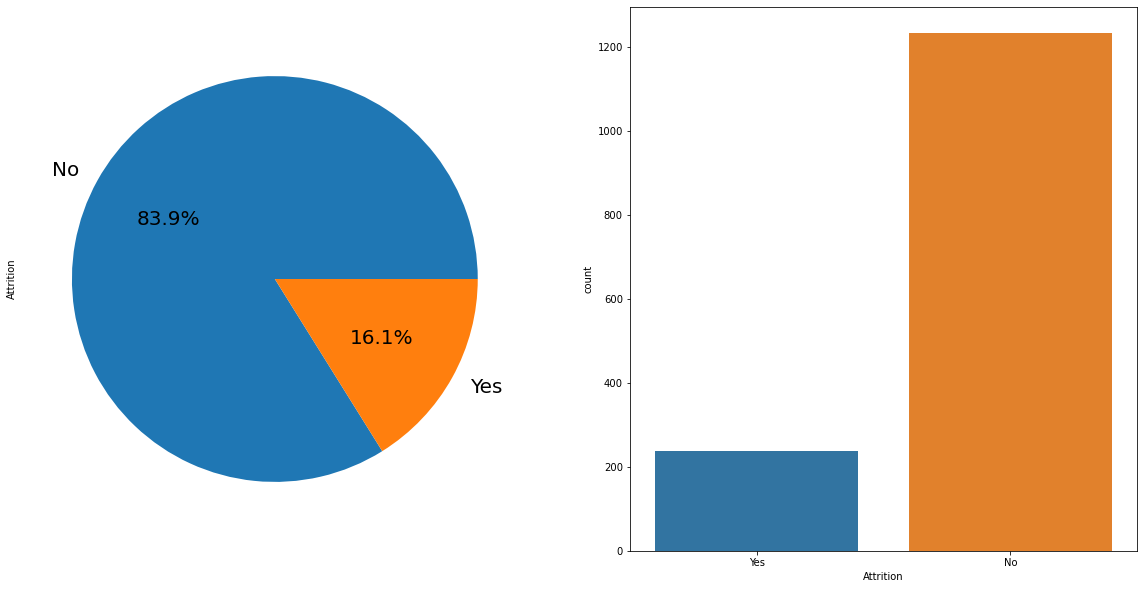

In [5]:

f, ax= plt.subplots(1,2,figsize=(20,10))

data['Attrition'].value_counts().plot.pie(autopct='%1.1f%%',
                                         ax=ax[0],
                                         fontsize=20)

sns.countplot("Attrition", data=data, ax=ax[1])
plt.show()



In [6]:
data["Attrition"].replace('Yes',1,inplace=True)
data["Attrition"].replace('No',0,inplace=True)
data['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

0: 미퇴직자. 1: 퇴직자

회사원 중 퇴사자 비율은 16.1%로 237명<br> 재직 비율은 83.9%로 1233명이다.

In [7]:
data.groupby(['Department','Attrition'])['Attrition'].count().to_frame()

Attrition
Department             Attrition           
Human Resources        0                 51
                       1                 12
Research & Development 0                828
                       1                133
Sales                  0                354
                       1                 92

In [8]:
data.groupby(['Department','Gender'])['Gender'].count().to_frame()

Gender
Department             Gender        
Human Resources        Female      20
                       Male        43
Research & Development Female     379
                       Male       582
Sales                  Female     189
                       Male       257

In [9]:
data.groupby(['Gender','Attrition'])['Attrition'].count().to_frame()

Attrition
Gender Attrition           
Female 0                501
       1                 87
Male   0                732
       1                150

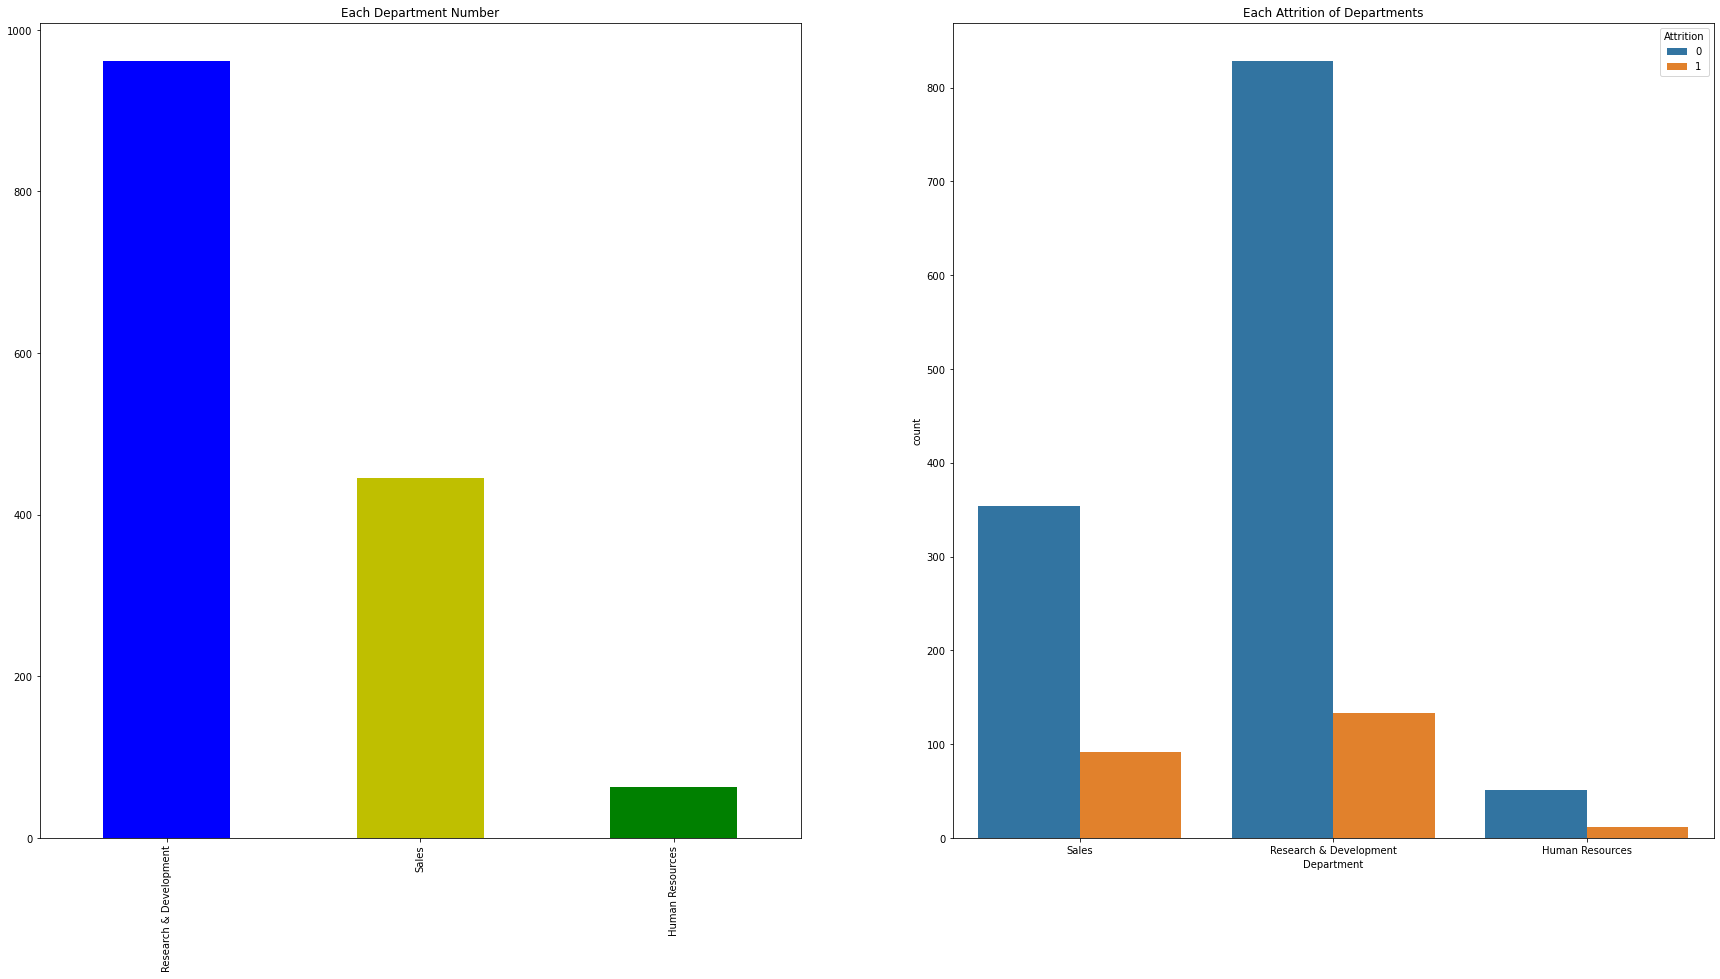

In [10]:
f, ax = plt.subplots(1,2, figsize=(30,15))


data["Department"].value_counts().plot.bar(ax=ax[0],
                                          color=['b','y','g'])
ax[0].set_title("Each Department Number")

sns.countplot('Department', hue="Attrition", data=data, ax=ax[1])
ax[1].set_title("Each Attrition of Departments")
plt.show()

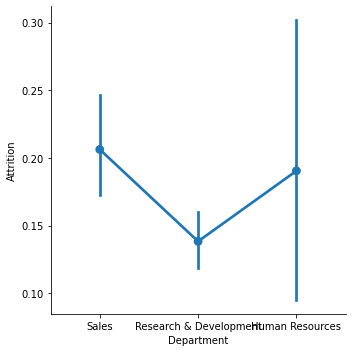

In [11]:
sns.factorplot('Department','Attrition', data=data)
plt.show()

 HumanResources = 20%<br>
 Research & Development= 13.83%<br>
 Sales = 20%<br>
 <br>
 Research & Development는 평균 퇴직 비율에 비해 3% 작고
 HumanResources와 Sales 부서는 평균 퇴직 비율에 비해 4% 높게 나타난다.

## BusinessTravel

In [12]:
data["BusinessTravel"].value_counts().to_frame()

,BusinessTravel
Travel_Rarely,1043
Travel_Frequently,277
Non-Travel,150


In [13]:
data.groupby(['BusinessTravel','Attrition'])['Attrition'].count().to_frame()

Attrition
BusinessTravel    Attrition           
Non-Travel        0                138
                  1                 12
Travel_Frequently 0                208
                  1                 69
Travel_Rarely     0                887
                  1                156

In [14]:
data.groupby(['BusinessTravel','Department'])['Department'].count().to_frame()

Department
BusinessTravel    Department                        
Non-Travel        Human Resources                  6
                  Research & Development          97
                  Sales                           47
Travel_Frequently Human Resources                 11
                  Research & Development         182
                  Sales                           84
Travel_Rarely     Human Resources                 46
                  Research & Development         682
                  Sales                          315

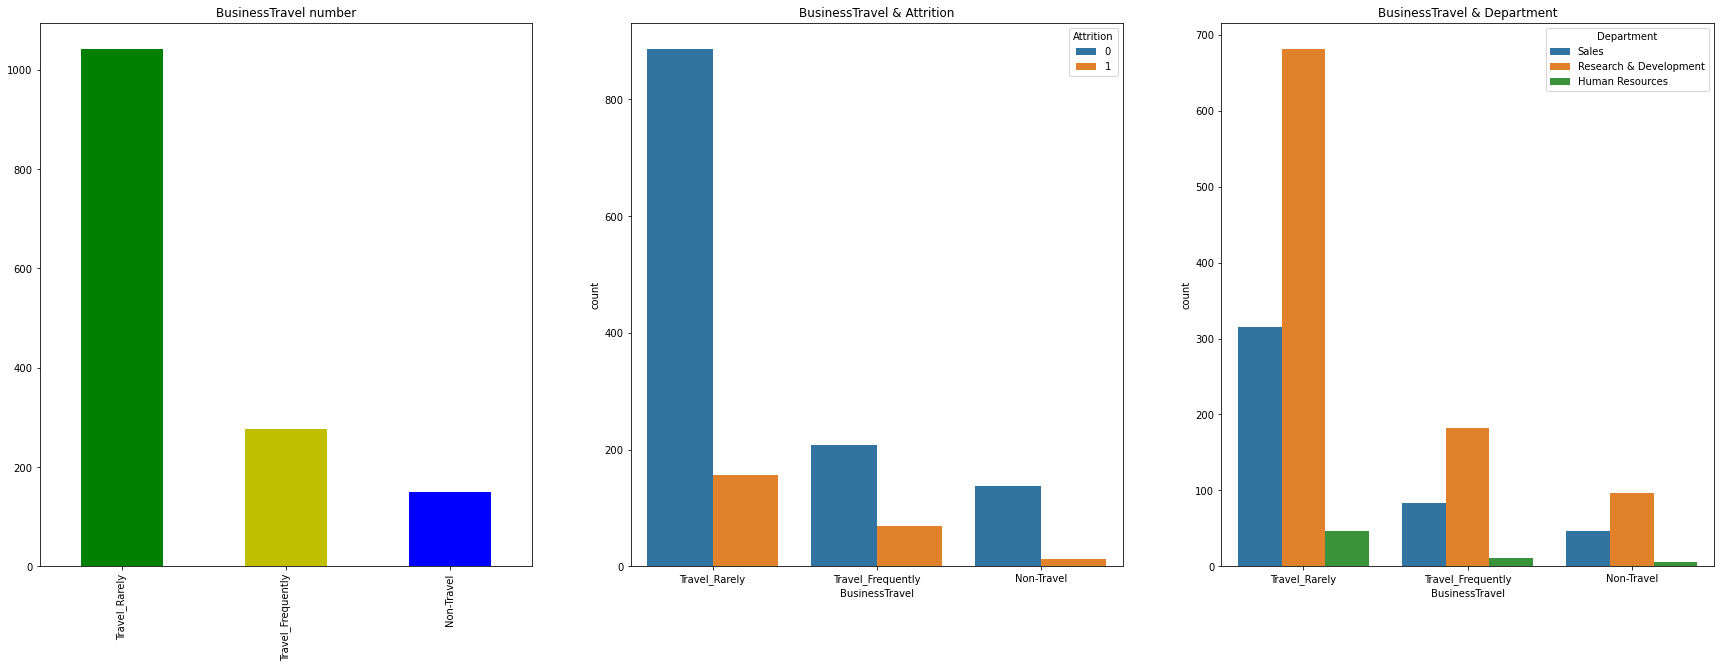

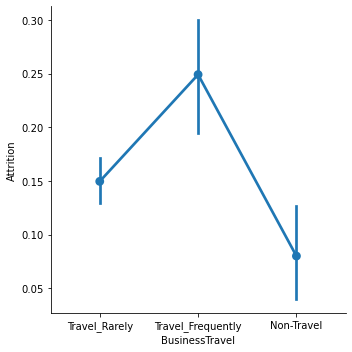

In [15]:
f, ax = plt.subplots(1,3,figsize=(30,10))

data['BusinessTravel'].value_counts().plot.bar(ax=ax[0], color=['g','y','b'])
ax[0].set_title("BusinessTravel number")

sns.countplot('BusinessTravel',hue='Attrition', data=data, ax=ax[1])
ax[1].set_title("BusinessTravel & Attrition")

sns.countplot('BusinessTravel',hue='Department', data=data, ax=ax[2])
ax[2].set_title("BusinessTravel & Department")

sns.factorplot('BusinessTravel', 'Attrition', data=data)
plt.show()

In [16]:
ResearchDevelopment0=97/961
ResearchDevelopment1=682/961
ResearchDevelopment2=97/961

Sales0=47/446
Sales1=315/446
Sales2=84/446

HumanResource0=6/63
HumanResource1=46/63
HumanResource2=11/63

print("Research&Development: ", ResearchDevelopment0,
     ResearchDevelopment1, ResearchDevelopment2)
print("Sales: ", Sales0, Sales1,Sales2)
print("Human Resource:",HumanResource0,HumanResource1,
     HumanResource2)

Research&Development:  0.10093652445369407 0.7096774193548387 0.10093652445369407
Sales:  0.10538116591928251 0.7062780269058296 0.18834080717488788
Human Resource: 0.09523809523809523 0.7301587301587301 0.1746031746031746


출장이 빈번한 이들의 퇴사 비율이 25%로 가장 낮았으며, 출장이 전혀 없는 직장이 약 10%미만의 비율을 보이고 있다. 

업무별로 출장비율을 보았을 때, Sales, Human Resource의 출장빈도가 가장 높은 이들이 각각 18.8%, 17.46%를 차지 반면에 R&D는 10.09% 차지

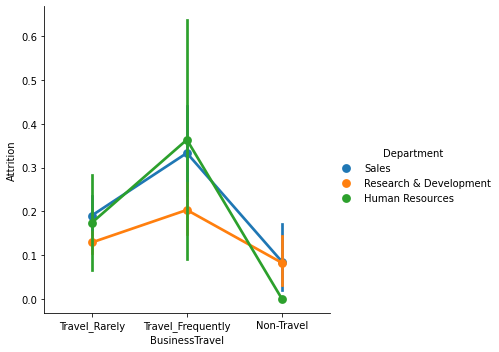

In [17]:
# 업무별로 출장회수에 따른 퇴직자의 비율 
sns.factorplot('BusinessTravel', 'Attrition', hue='Department', data=data)
plt.show()

sales, Human Resources에서 유의미한 차이가 발생.<br> 출장이 빈번한 이즉의 퇴사율이 30% 가량으로 평균의 약 2배 수준.<br>

## JobInvolvement

In [18]:
data['JobInvolvement'].value_counts().to_frame()

,JobInvolvement
3,868
2,375
4,144
1,83


Text(0.5, 1.0, 'JobInvolvement & BusinessTravel')

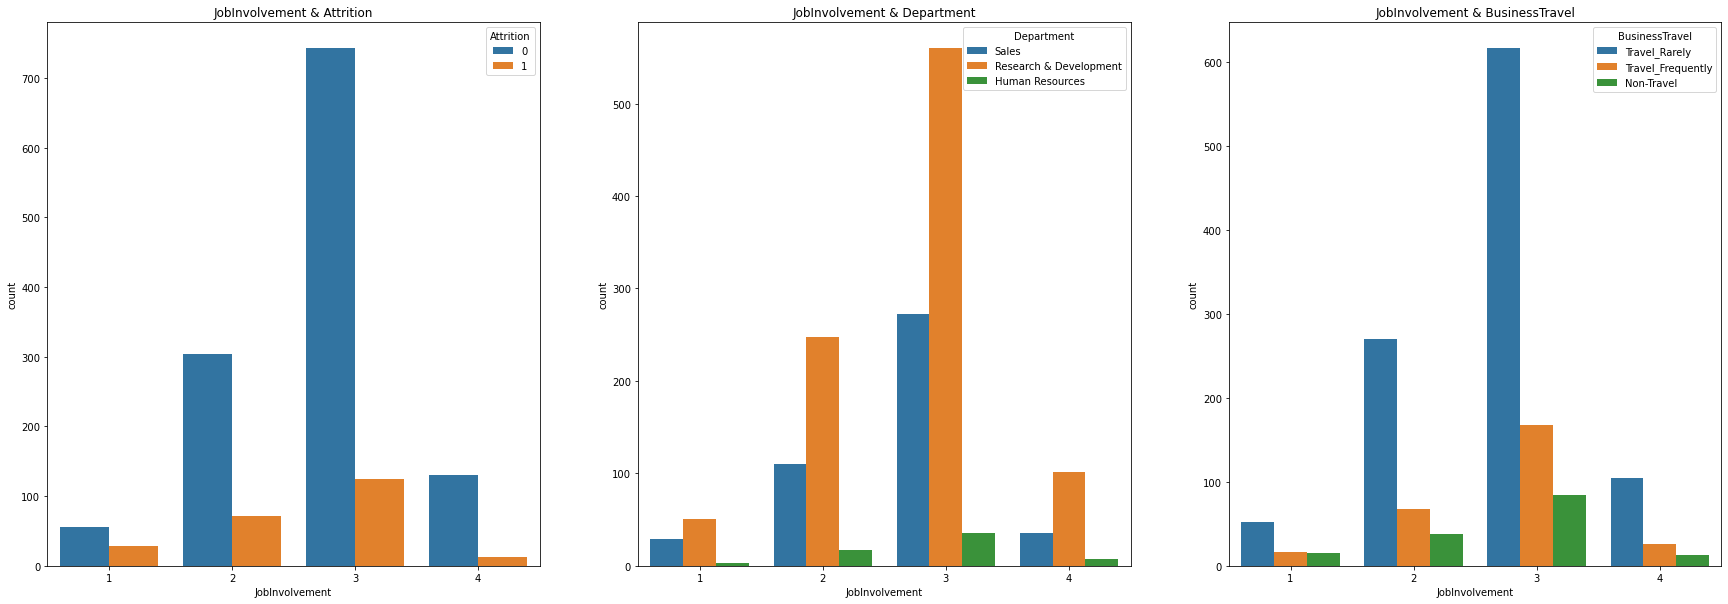

In [19]:
f, ax = plt.subplots(1,3,figsize=(30,10))

sns.countplot('JobInvolvement', hue="Attrition", data=data,ax=ax[0])
ax[0].set_title('JobInvolvement & Attrition')

sns.countplot('JobInvolvement', hue="Department", data=data,ax=ax[1])
ax[1].set_title('JobInvolvement & Department') 

sns.countplot('JobInvolvement', hue="BusinessTravel", data=data,ax=ax[2])
ax[2].set_title('JobInvolvement & BusinessTravel') # 비율이 일정.

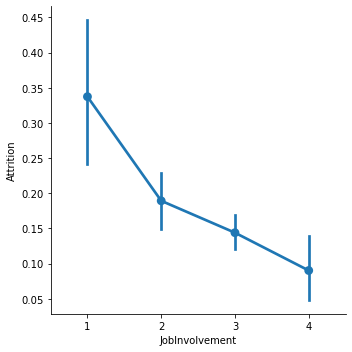

In [20]:
sns.factorplot('JobInvolvement', 'Attrition', data=data)
plt.show()

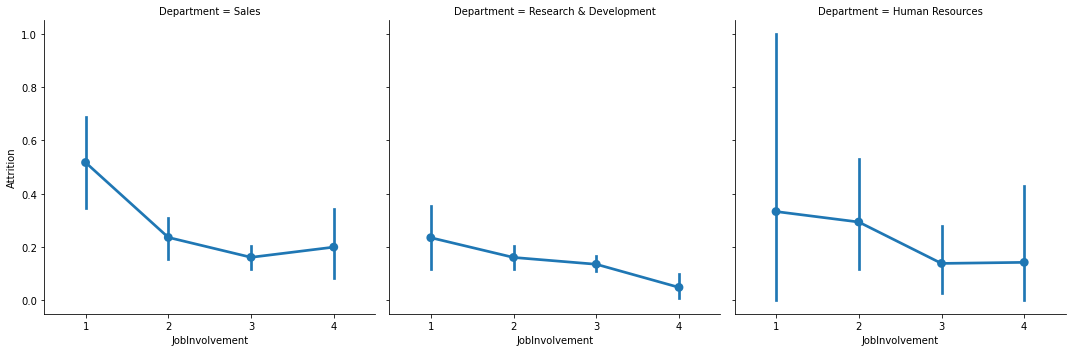

In [21]:
sns.factorplot('JobInvolvement', 'Attrition',col="Department", data=data)
plt.show() 

sales부분에서 차이가 심하게 나타남. 평균적으로 직업적 연관성이 적을수록 평균 퇴사 비율이 16%보다 높게 나타난다.

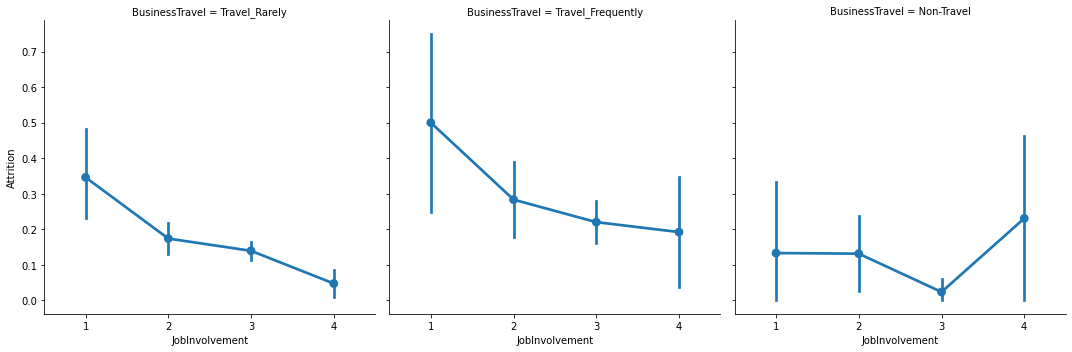

In [22]:
sns.factorplot('JobInvolvement', 'Attrition',col="BusinessTravel", data=data)
plt.show() 

출장이 드문 경우, 직업 연관성이 적을수록 퇴사자 비율이 높다<br>
출장이 빈번한 경우, 직업 연관성이 적을수록 퇴사자 비율이 높다.<br>
출장이 없는 경우에는 유의미한 차이가 없다. <br>
직업연관성이 적고 출장빈도가 높으면 높을수록 퇴사 비율이 증가함을 알 수 있다. 

## JobLevel (직무수준)

In [23]:
data["JobLevel"].value_counts().to_frame()

,JobLevel
1,543
2,534
3,218
4,106
5,69


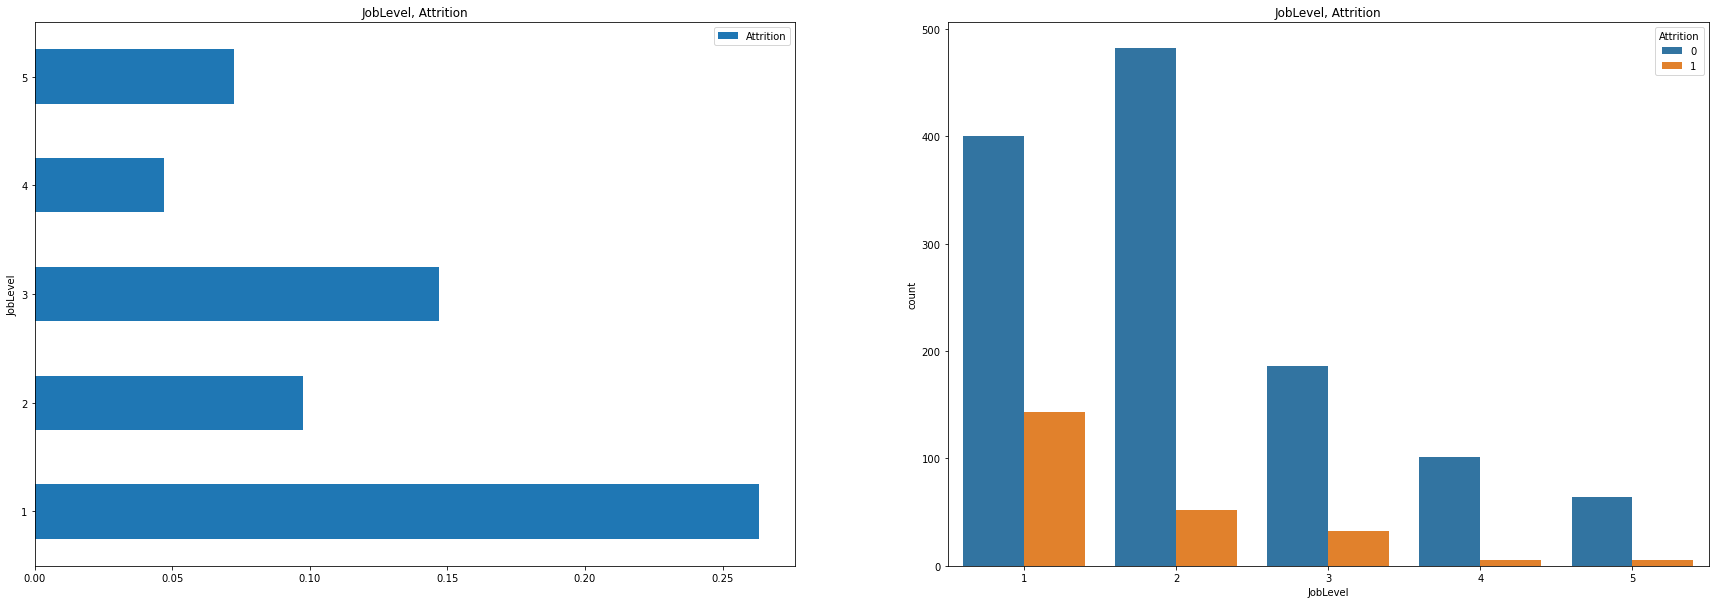

In [24]:
f, ax = plt.subplots(1,2,figsize=(30,10))

data[['Attrition','JobLevel']].groupby(['JobLevel']).mean().plot.barh(ax=ax[0]) 
ax[0].set_title('JobLevel, Attrition') 

sns.countplot('JobLevel', hue="Attrition", data=data, ax=ax[1])
ax[1].set_title("JobLevel, Attrition")
plt.show()

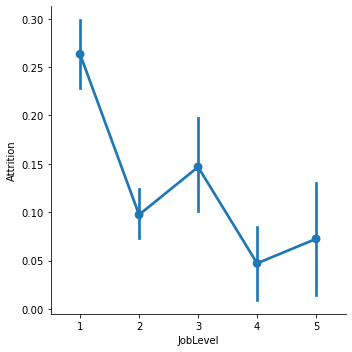

In [25]:
sns.factorplot('JobLevel', 'Attrition', data=data)
plt.show() 

JobLevel 이 낮은 경우 퇴사율이 유의미한 차이를 보이고 있다. <br>

In [26]:
data.groupby(['BusinessTravel','JobLevel'])['JobLevel'].count().to_frame()

JobLevel
BusinessTravel    JobLevel          
Non-Travel        1               48
                  2               67
                  3               20
                  4               11
                  5                4
Travel_Frequently 1              104
                  2              104
                  3               40
                  4               19
                  5               10
Travel_Rarely     1              391
                  2              363
                  3              158
                  4               76
                  5               55

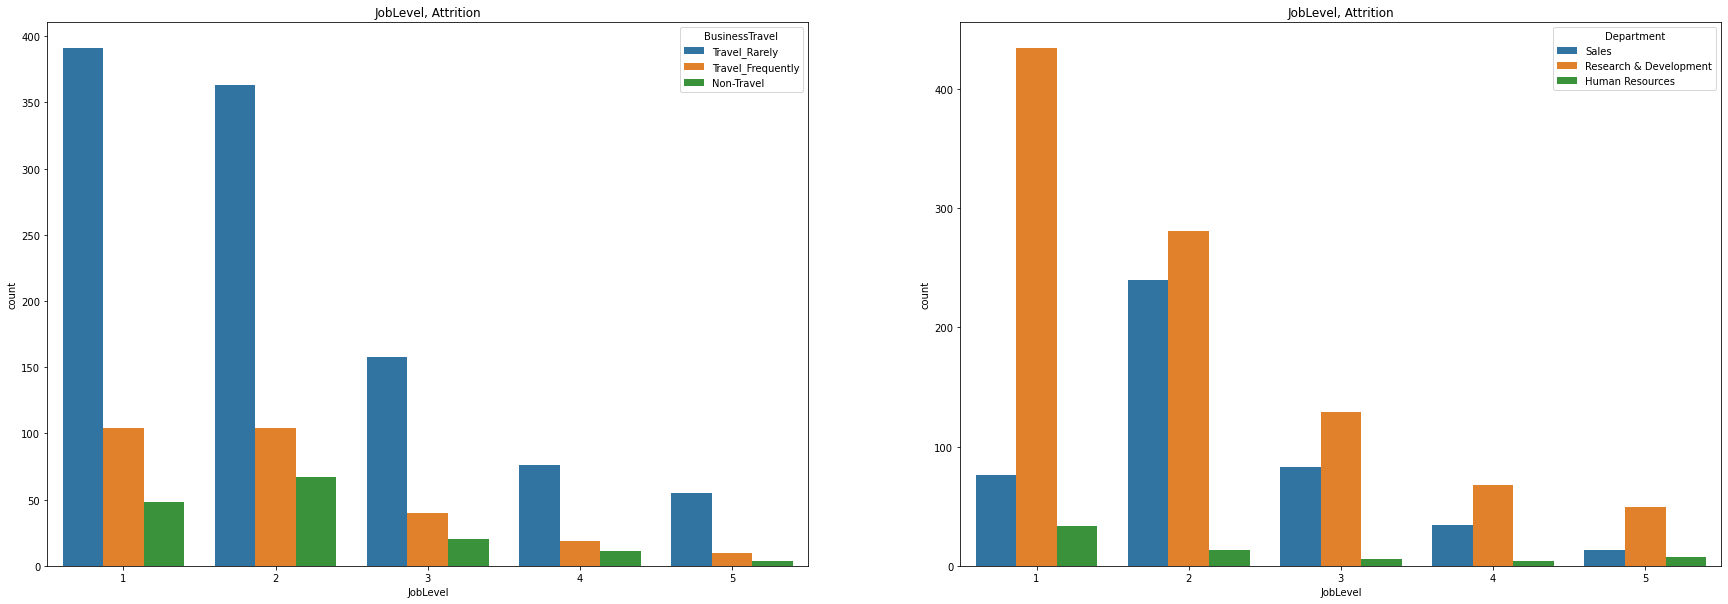

In [27]:
f, ax = plt.subplots(1,2,figsize=(30,10))

sns.countplot('JobLevel', hue="BusinessTravel", data=data, ax=ax[0])
ax[0].set_title("JobLevel, Attrition")


sns.countplot('JobLevel', hue="Department", data=data, ax=ax[1])
ax[1].set_title("JobLevel, Attrition")
plt.show()


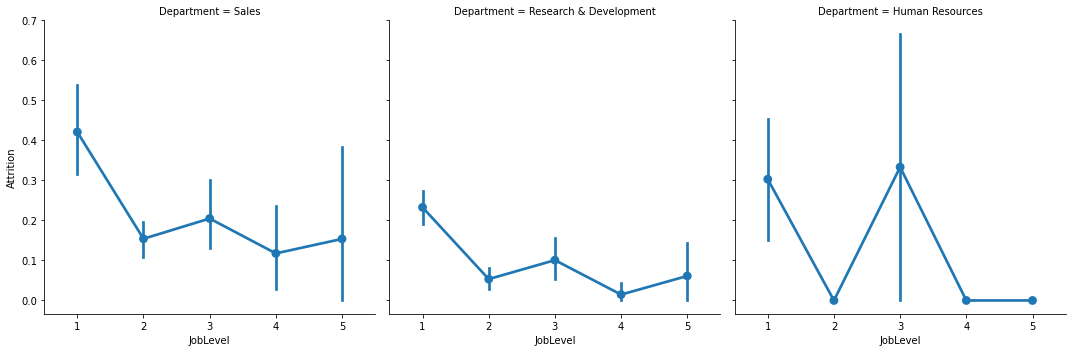

In [28]:
sns.factorplot('JobLevel', 'Attrition',col="Department", data=data)
plt.show() 

모든 부서에서 JobLevel이 1인 경우 퇴사율이 낮으며, 특이점으로 Human Resources에서는 3의 JobLevel에서 1과 유사한 정도의 퇴사율이 나타나고 있다. <br>
출장의 빈도는 모든 직종과 직업 지위에 따라 유사한 변화를 보이고 있다. 

## JobRole (직무역할)

In [29]:
data["JobRole"].value_counts().to_frame()

,JobRole
Sales Executive,326
Research Scientist,292
Laboratory Technician,259
Manufacturing Director,145
Healthcare Representative,131
Manager,102
Sales Representative,83
Research Director,80
Human Resources,52


In [30]:
data.groupby(['JobRole','Department'])['Department'].count().to_frame()

Department
JobRole                   Department                        
Healthcare Representative Research & Development         131
Human Resources           Human Resources                 52
Laboratory Technician     Research & Development         259
Manager                   Human Resources                 11
                          Research & Development          54
                          Sales                           37
Manufacturing Director    Research & Development         145
Research Director         Research & Development          80
Research Scientist        Research & Development         292
Sales Executive           Sales                          326
Sales Representative      Sales                           83

Sales=[Sales Executive, Sales Representative, Manager ]<br>
Research & Development =[Research Director,Research Scientist, Laboratory Technician, Manufacturing Director ,
                           Healthcare Representative ,Manager ]<br>
Human Resources =[Human Resources ,Manager]<br>

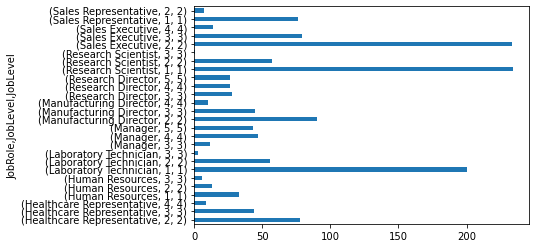

In [31]:
data.groupby(['JobRole','JobLevel'])['JobLevel'].value_counts().plot.barh()
plt.show()

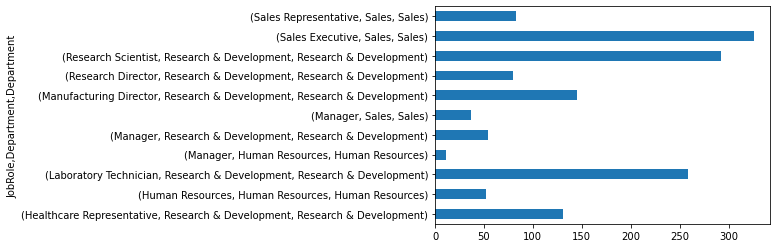

In [32]:

data.groupby(['JobRole','Department'])['Department'].value_counts().plot.barh()
plt.show()

Text(0.5, 1.0, "Human Resources's JobRole")

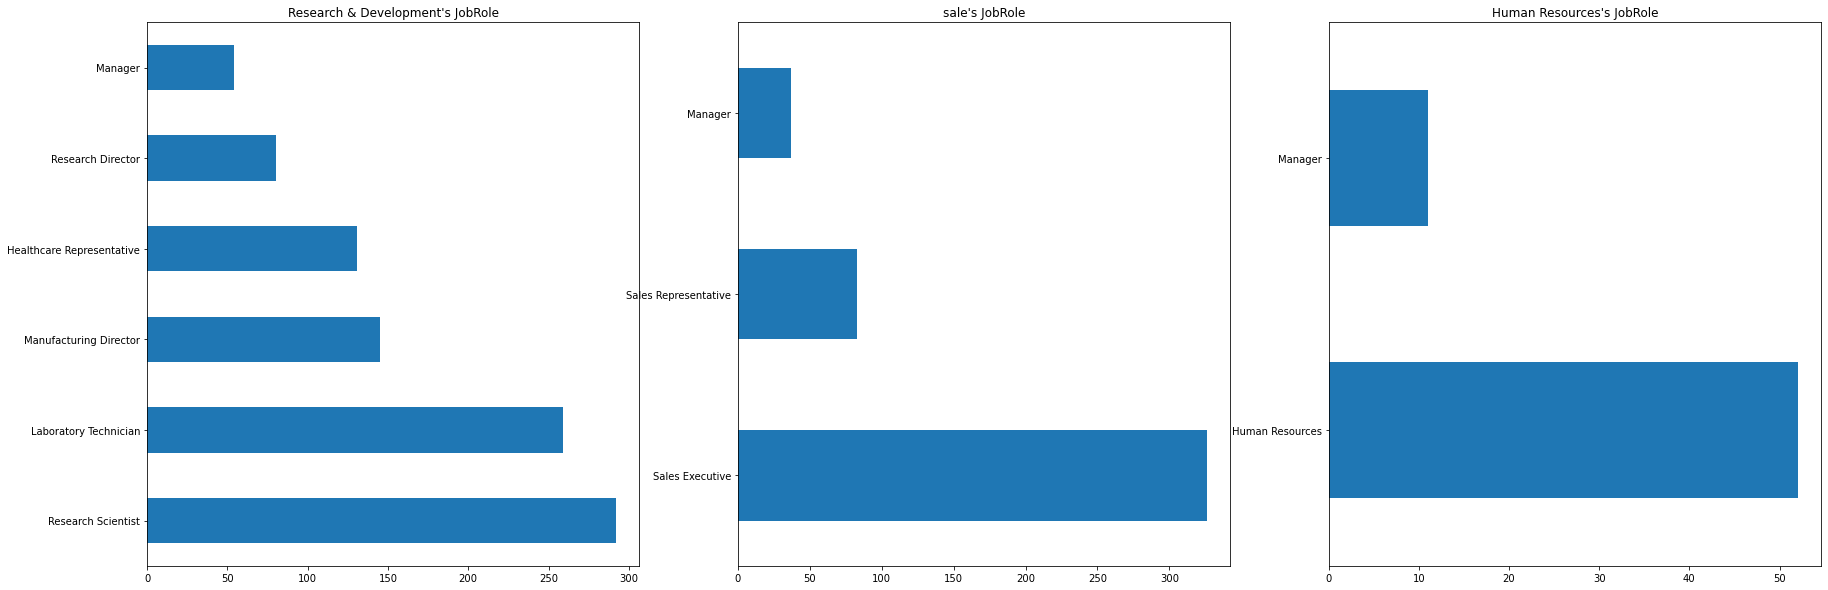

In [33]:
f, ax = plt.subplots(1,3,figsize=(30,10))

data[data['Department']=="Research & Development"]['JobRole'].value_counts().plot.barh(ax=ax[0])
ax[0].set_title("Research & Development's JobRole")

data[data['Department']=="Sales"]['JobRole'].value_counts().plot.barh(ax=ax[1])
ax[1].set_title("sale's JobRole")

data[data['Department']=="Human Resources"]['JobRole'].value_counts().plot.barh(ax=ax[2])
ax[2].set_title("Human Resources's JobRole")

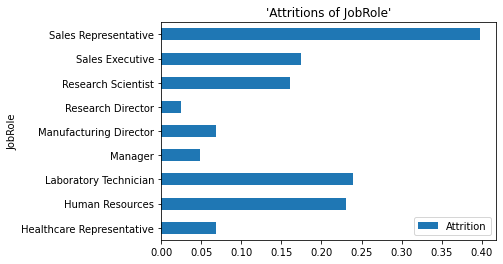

In [34]:
data[['Attrition','JobRole']].groupby(['JobRole']).mean().plot.barh() 
plt.title("'Attritions of JobRole'")
plt.show()


#### Laboratory Technician 

#### Sales Representative

#### Human Resources

각 업무에서 job level이 1에 해당하는 직업이 20% 이상이었으며, Sales Representative의 경우 40% 육박하였다. (jobLevel 1의 비율이 91.5%)

Sales=[Sales Executive(2,3,4), Sales Representative(1,2), Manager(3,4,5) ]<br>
Research & Development =[Research Director(3,4,5), Research Scientist(1,2,3), Laboratory Technician(1,2,3),<br>'
     Manufacturing Director(2,3,4) ,Healthcare Representative(2,3,4) ,Manager(3,4,5) ]<br>
Human Resources =[Human Resources(1,2,3) ,Manager(3,4,5)]<br>

JobLevel 과 JobRole에서 Attrition과의 연관성이 매우 높은 것으로 나타난다.

## OverTime(초과근무)

In [35]:
data["OverTime"].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

<AxesSubplot:xlabel='OverTime', ylabel='count'>

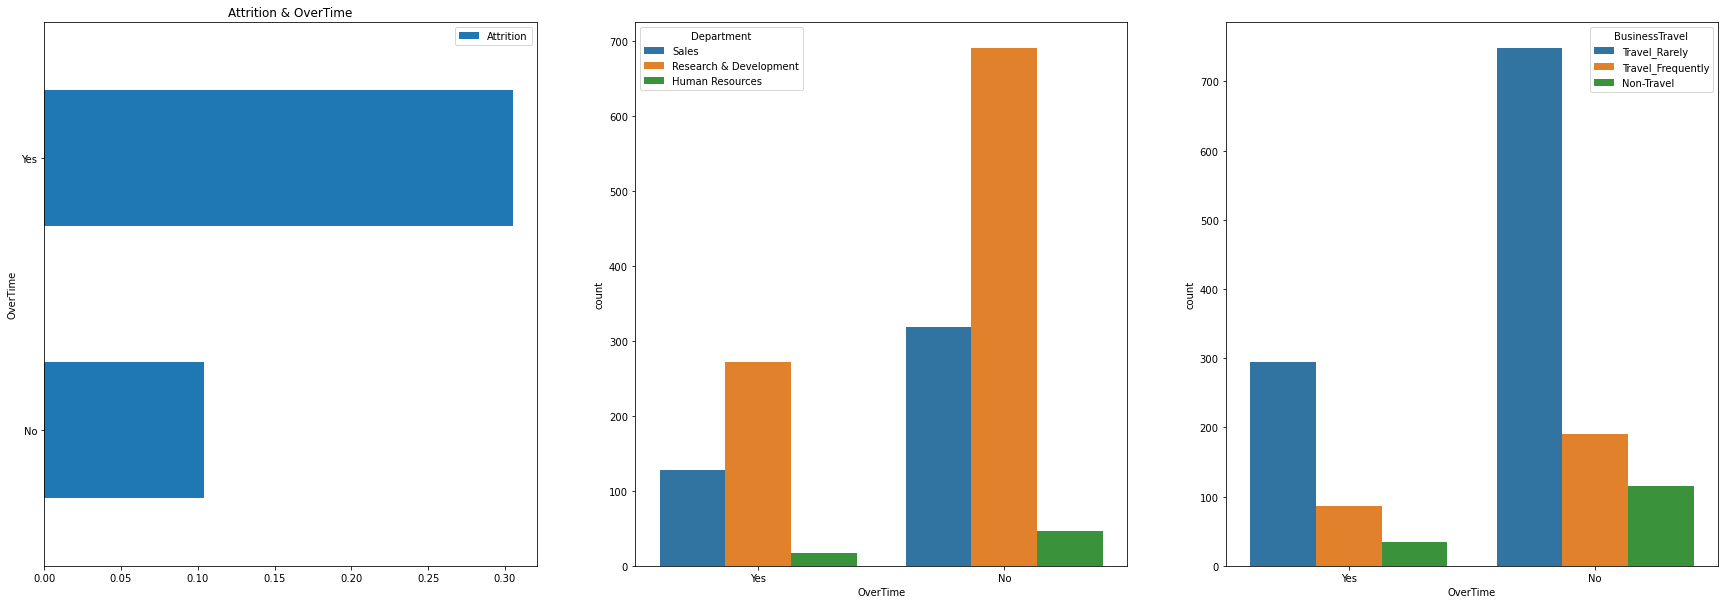

In [36]:
f, ax = plt.subplots(1,3,figsize=(30,10))

data[['Attrition','OverTime']].groupby(['OverTime']).mean().plot.barh(ax=ax[0]) 
ax[0].set_title("Attrition & OverTime") 

sns.countplot("OverTime", hue="Department", data=data, ax=ax[1])


sns.countplot("OverTime", hue="BusinessTravel", data=data, ax=ax[2])


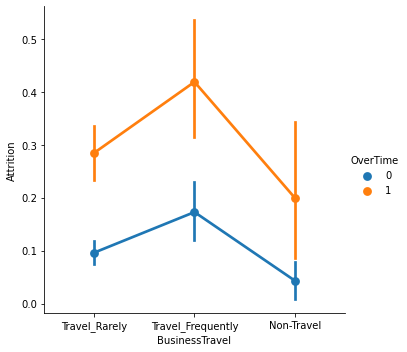

In [37]:
data["OverTime"].replace("Yes", 1 , inplace=True)
data["OverTime"].replace("No", 0 , inplace=True)

sns.factorplot('BusinessTravel','Attrition', hue="OverTime", data=data)
plt.show()

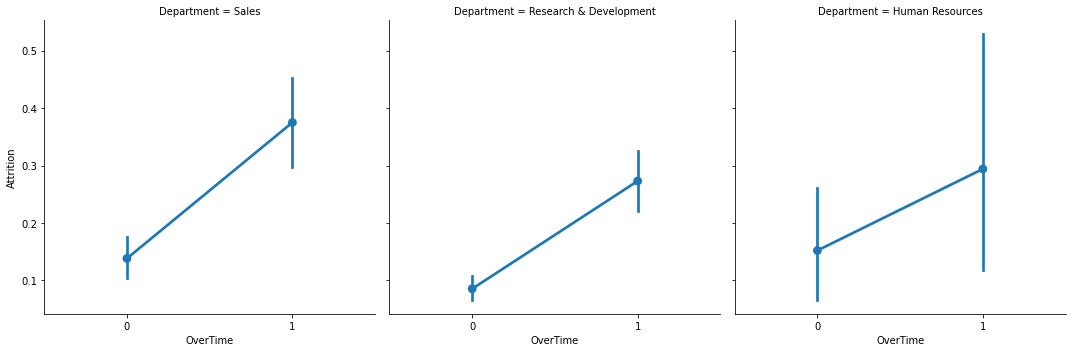

In [38]:
sns.factorplot("OverTime",'Attrition', col='Department', data=data)
plt.show()

 초과 근무가 있을 경우 최사 비율이 30%, 초과근무가 없는 경우 퇴사비율이 10%로 3 배가량 차이가 난다. 
 
 출장 횟수가 많을 수록, 초과근무도 증가하며, 출장횟수와 초과근무가 많을 수록 퇴사자들도 증가함. 각 부서별로도 초과근무가 있으면, 퇴사비율이 증가하는 경향이 발생. 

## PerformanceRating

In [39]:
data['PerformanceRating'].value_counts().to_frame()
# Excellent 와  #Outstanding  만 존재. 유의미한 차이가 있을까?

,PerformanceRating
3,1244
4,226


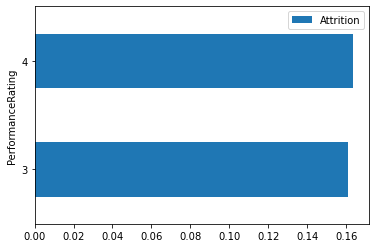

In [40]:
data[["Attrition",'PerformanceRating']].groupby(['PerformanceRating']).mean().plot.barh()
plt.show()
#유의미한 차이 X!!!

## TrainingTimesLastYear

In [41]:
data['TrainingTimesLastYear'].value_counts().to_frame()

,TrainingTimesLastYear
2,547
3,491
4,123
5,119
1,71
6,65
0,54


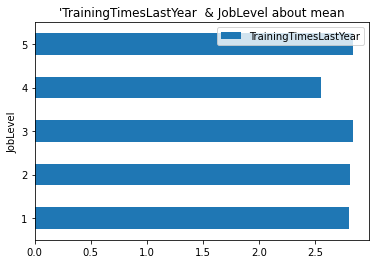

In [42]:
data[['TrainingTimesLastYear','JobLevel']].groupby(['JobLevel']).mean().plot.barh() 
plt.title("'TrainingTimesLastYear  & JobLevel about mean")
plt.show()

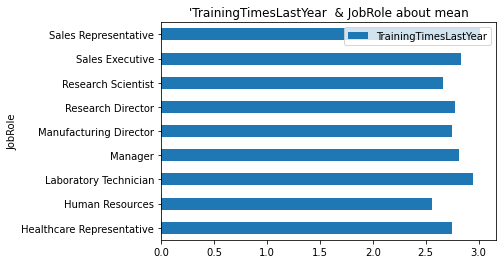

In [43]:
data[['TrainingTimesLastYear','JobRole']].groupby(['JobRole']).mean().plot.barh() 
plt.title("'TrainingTimesLastYear  & JobRole about mean")
plt.show()

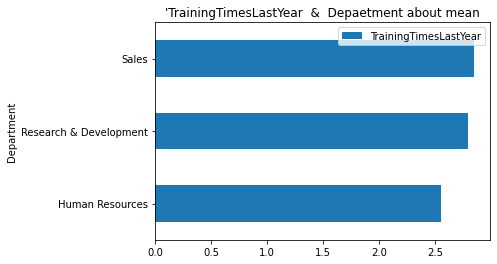

In [44]:
data[['TrainingTimesLastYear','Department']].groupby(['Department']).mean().plot.barh() 
plt.title("'TrainingTimesLastYear  &  Depaetment about mean")
plt.show()

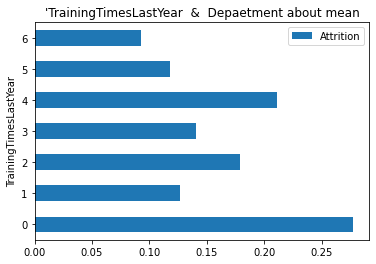

In [45]:
data[['TrainingTimesLastYear','Attrition']].groupby(['TrainingTimesLastYear']).mean().plot.barh() 
plt.title("'TrainingTimesLastYear  &  Depaetment about mean")
plt.show()

지난 학습 기간이 0인 그룹이 퇴사 비율이 가장 높았다. 그다음이 4시간인 이들이다. 

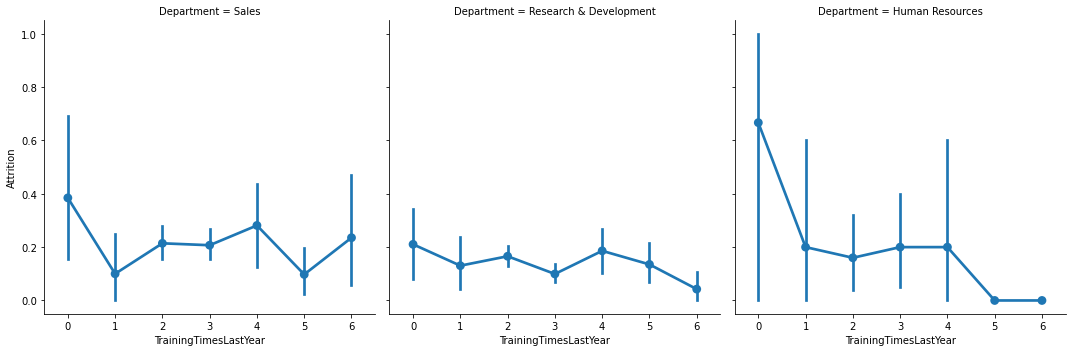

In [46]:
sns.factorplot('TrainingTimesLastYear','Attrition',col='Department',data=data)

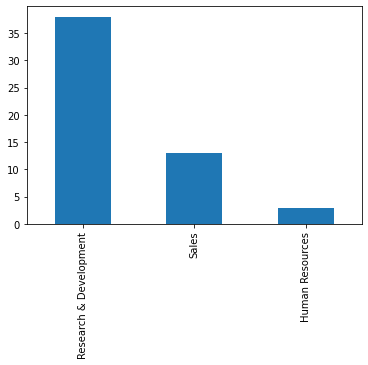

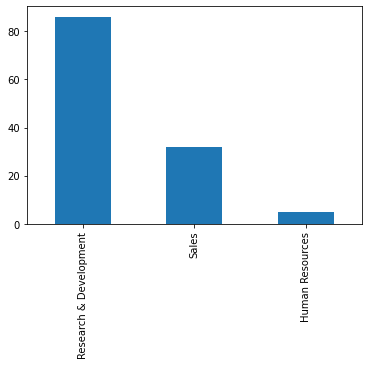

In [47]:
data[data['TrainingTimesLastYear']==0]['Department'].value_counts().plot.bar()
plt.show()
data[data['TrainingTimesLastYear']==4]['Department'].value_counts().plot.bar()
plt.show()

직무 역활, 직무 수준, 부서에서의 평균 트레이닝 시간이 대부분 비슷하다. 
0시간 4시간의 비중이 R&D에 많은 것은 단지 R&D의 직무 인원이 많기 때문이다.
유의미한 차이가 있지는 않는 것 같다. 아마 연차와 연관이 있지 않을까??


# Department & 25%

## 목차확인 

[department, joblevel, jobrole, totalworkyear, yearsatcompany]

## SalaryHike_range에 따른 그룹 새롭게 설정하기 

In [62]:
dataNew

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_band,SalaryHike_range
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,11,4,...,1,1,2,3,1,0,0,0,1,4
26,32,1,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,33,2,...,0,10,5,3,10,2,6,7,1,4
39,33,0,Travel_Frequently,1141,Sales,1,3,Life Sciences,52,3,...,2,10,3,3,5,3,1,3,1,4
44,30,0,Travel_Frequently,721,Research & Development,1,2,Medical,57,3,...,0,12,2,3,12,8,3,7,1,4
54,26,0,Travel_Rarely,1443,Sales,23,3,Marketing,72,3,...,1,5,2,2,2,2,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,32,0,Travel_Rarely,801,Sales,1,4,Marketing,2016,3,...,2,14,3,3,14,10,5,7,1,4
1433,25,0,Travel_Rarely,1382,Sales,8,2,Other,2018,1,...,1,6,3,2,5,3,0,4,0,4
1438,23,1,Travel_Frequently,638,Sales,9,3,Marketing,2023,4,...,1,1,3,2,1,0,1,0,0,4
1463,31,0,Non-Travel,325,Research & Development,5,3,Medical,2057,2,...,0,10,2,3,9,4,1,7,1,4


In [85]:
# age_band 만들기
data['Age_band'] = 0
data.loc[data['Age'] <= 25, 'Age_band'] = 0
data.loc[(data['Age'] > 25) & (data['Age'] <= 33), 'Age_band'] = 1
data.loc[(data['Age'] > 33) & (data['Age'] <= 41), 'Age_band'] = 2
data.loc[(data['Age'] >= 42) & (data['Age'] <= 49), 'Age_band'] = 3
data.loc[data['Age'] > 49, 'Age_band'] = 4

data['SalaryHike_range'] = pd.qcut(data['PercentSalaryHike'], q=4,labels=[1,2,3,4])
#data_talent = data[data['SalaryHike_range']==4]

dataNew=data.loc[(data["Age"]<34)&(data['SalaryHike_range']==4)]

In [82]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_band,SalaryHike_range
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,0,8,0,1,6,4,0,5,2,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,1,10,3,3,10,7,1,7,3,4
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,0,7,3,3,0,0,0,0,2,3
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,0,8,3,3,8,7,3,0,1,1
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,1,6,3,3,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,1,17,3,3,5,2,0,3,2,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,1,9,5,3,7,7,1,7,2,3
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,1,6,0,3,6,2,0,3,1,4
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,0,17,3,2,9,6,0,8,3,2


## Department

                        Department
Research & Development          87
Sales                           35
Human Resources                  3
                        Attrition
Department                       
Human Resources          0.000000
Research & Development   0.229885
Sales                    0.200000


<AxesSubplot:ylabel='Attrition'>

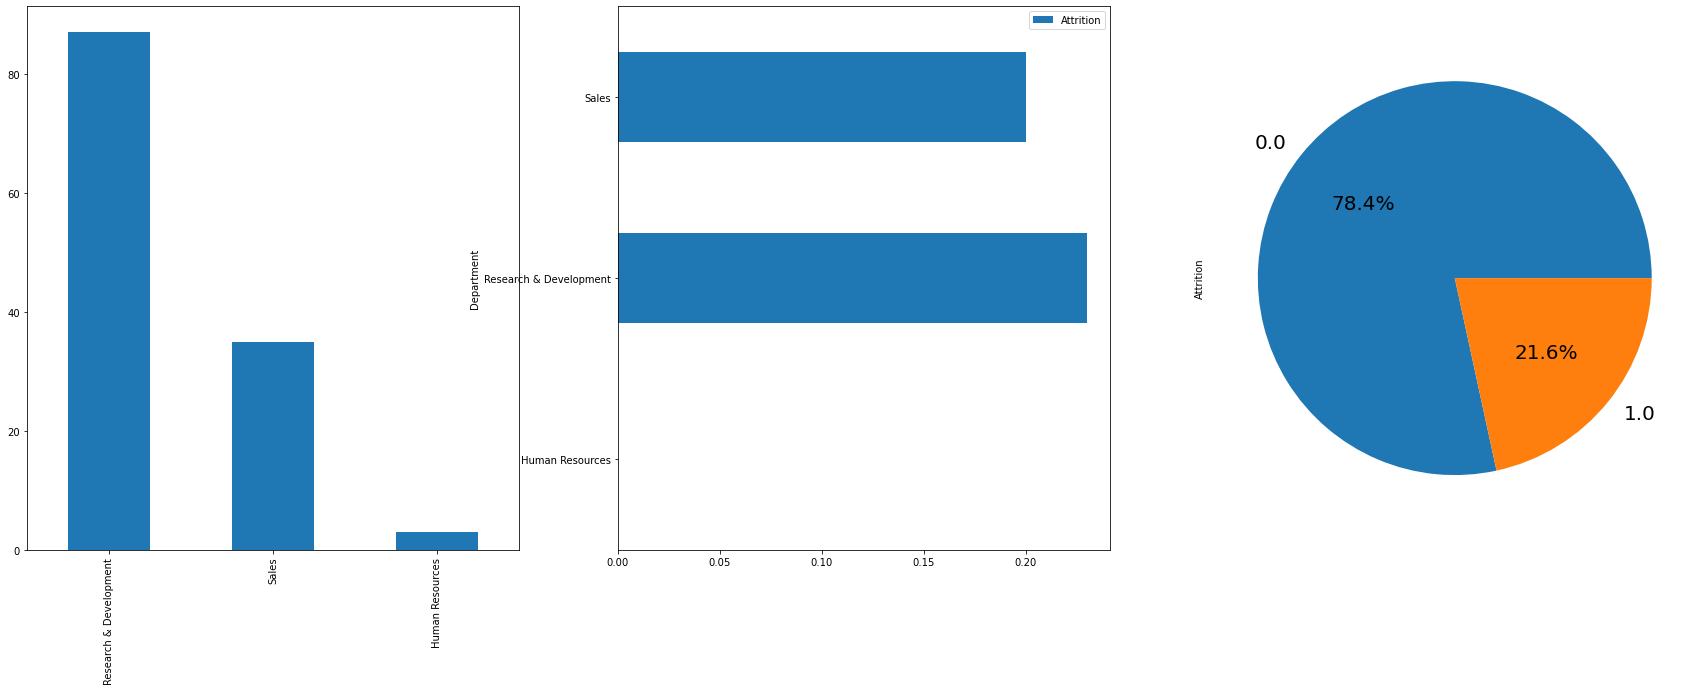

In [98]:
dataNew['Attrition']=dataNew['Attrition'].astype("float")
f,ax=plt.subplots(1,3,figsize=(30,10))



dataNew['Department'].value_counts().plot.bar(ax=ax[0])
print(dataNew['Department'].value_counts().to_frame())

dataNew[['Attrition','Department']].groupby(['Department']).mean().plot.barh(ax=ax[1])
print(dataNew[['Attrition','Department']].groupby(['Department']).mean())

dataNew['Attrition'].value_counts().plot.pie(autopct='%1.1f%%',
                                         ax=ax[2],
                                         fontsize=20)


1. 34세 이하, 임금상승률이 25% 이상에 속하는 인원은 총 125명이고 이중에서 R&D: 87, Sa;es:35, HR:3명이다. 
2. 이중 HR은 퇴사가 없었으며(인원이 매우 낮기에, 유용한 변별력 x), R&D 22.98%, Sales 20%였다. 이 두집단은 평균 퇴사율 보다 높게 나타났다.
3. 이들의 평균 퇴사율은 21.6%이다.

##  JobLevel

   JobLevel
1        67
2        45
3        12
4         1
                        JobLevel
Department                      
Human Resources         1.333333
Research & Development  1.482759
Sales                   1.828571


JobLevel
Department             JobLevel          
Human Resources        1                2
                       2                1
Research & Development 1               54
                       2               25
                       3                7
                       4                1
Sales                  2               19
                       1               11
                       3                5

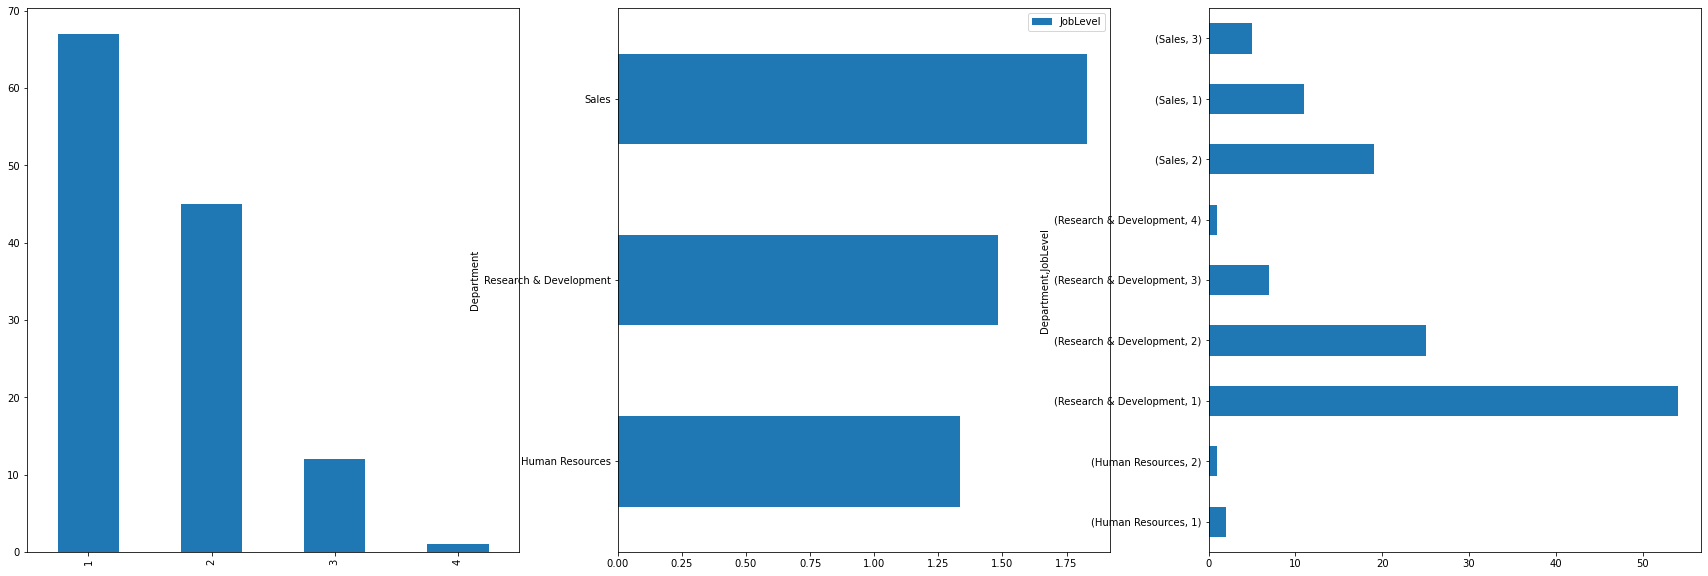

In [108]:
f,ax=plt.subplots(1,3,figsize=(30,10))



dataNew['JobLevel'].value_counts().plot.bar(ax=ax[0])
print(dataNew['JobLevel'].value_counts().to_frame())

dataNew[['JobLevel','Department']].groupby(['Department']).mean().plot.barh(ax=ax[1])
print(dataNew[['JobLevel','Department']].groupby(['Department']).mean())

dataNew.groupby(['Department'])['JobLevel'].value_counts().plot.barh(ax=ax[2])
dataNew.groupby(['Department'])['JobLevel'].value_counts().to_frame()
#sns.countflots("JobLevel", hue='Department', data=dataNew, ax=ax[2])

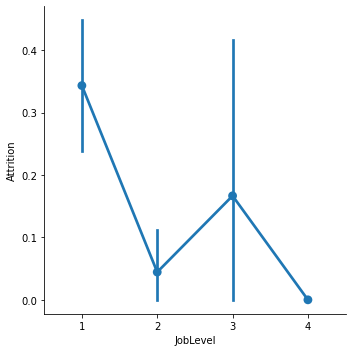

,Attrition
JobLevel,
1,0.343284
2,0.044444
3,0.166667
4,0.000000


In [116]:
sns.factorplot('JobLevel', 'Attrition', data=dataNew)
plt.show() 

dataNew.groupby(['JobLevel'])['Attrition'].mean().to_frame()

1. JobLevel에서 1이 차지하는 비율이49.6%로 가장 많으며, 2는 36%, 3은 9.6% 4는 0.8%를 차지하고 있다.
2. 이중 R&D 에 속하는 1레벨의 인원이 62%로 가장 높았다 (HR은 표본이 작기에 제외)
3. 퇴사자 비율은 1레벨이 34%, 2레벨이 4.4%, 3레벨이 16.6% 4레벨은 0% 였다. R&D의 평균 job Level에 가장 낮기에 (HR 제외) 이들을 어떻게 퇴직하게 안할지 고민해야 할 필요가 있다.

## JobRole

In [125]:
dataNew.groupby(['JobRole','Department'])['Department'].count().to_frame()

Department
JobRole                   Department                        
Healthcare Representative Research & Development           8
Human Resources           Human Resources                  3
Laboratory Technician     Research & Development          21
Manager                   Research & Development           2
                          Sales                            1
Manufacturing Director    Research & Development          17
Research Director         Research & Development           2
Research Scientist        Research & Development          37
Sales Executive           Sales                           22
Sales Representative      Sales                           12

Research Scientist           37
Laboratory Technician        21
Manufacturing Director       17
Healthcare Representative     8
Research Director             2
Manager                       2
Name: JobRole, dtype: int64

Sales Executive         22
Sales Representative    12
Manager                  1
Name: JobRole, dtype: int64

Human Resources    3
Name: JobRole, dtype: int64



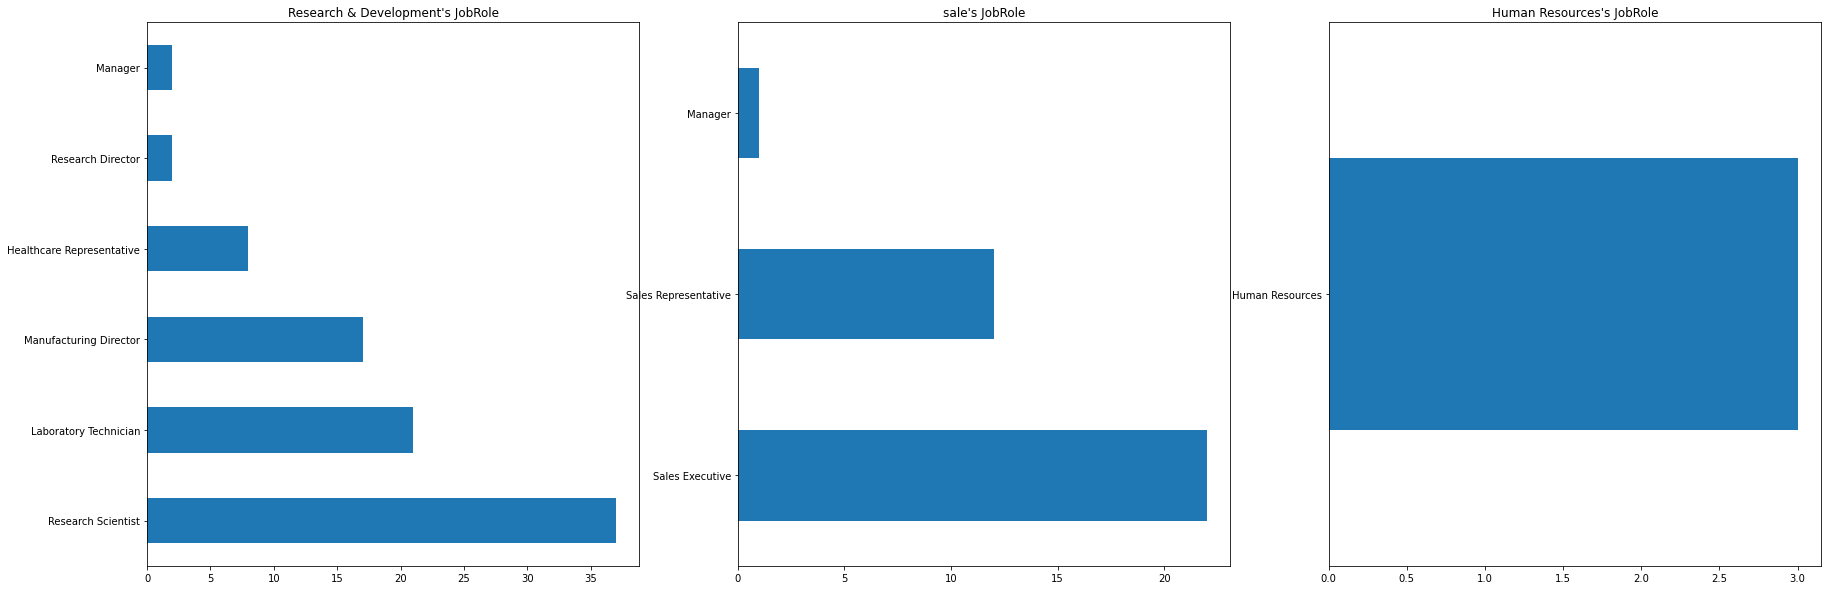

In [133]:
f, ax = plt.subplots(1,3,figsize=(30,10))

dataNew[dataNew['Department']=="Research & Development"]['JobRole'].value_counts().plot.barh(ax=ax[0])
ax[0].set_title("Research & Development's JobRole")

dataNew[dataNew['Department']=="Sales"]['JobRole'].value_counts().plot.barh(ax=ax[1])
ax[1].set_title("sale's JobRole")

dataNew[dataNew['Department']=="Human Resources"]['JobRole'].value_counts().plot.barh(ax=ax[2])
ax[2].set_title("Human Resources's JobRole")

print(dataNew[dataNew['Department']=="Research & Development"]['JobRole'].value_counts())
print("")
print(dataNew[dataNew['Department']=="Sales"]['JobRole'].value_counts())
print("")
print(dataNew[dataNew['Department']=="Human Resources"]['JobRole'].value_counts())
print("")

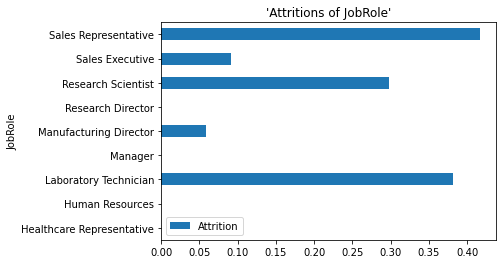

                           Attrition
JobRole                             
Healthcare Representative   0.000000
Human Resources             0.000000
Laboratory Technician       0.380952
Manager                     0.000000
Manufacturing Director      0.058824
Research Director           0.000000
Research Scientist          0.297297
Sales Executive             0.090909
Sales Representative        0.416667


In [135]:
dataNew[['Attrition','JobRole']].groupby(['JobRole']).mean().plot.barh() 
plt.title("'Attritions of JobRole'")
plt.show()

print(dataNew[['Attrition','JobRole']].groupby(['JobRole']).mean())

Sales= [Sales Executive(2,3,4) : 22, Sales Representative(1,2) : 12, Manager(3,4,5): 1 ]<br><br>
Research & Development = [Research Scientist(1,2,3) : 37, Laboratory Technician(1,2,3) : 21,<br>
                      Manufacturing Director(2,3,4) : 17 ,Healthcare Representative(2,3,4) : 8,<br>
                        Research Director(3,4,5) : 2, Manager(3,4,5) : 2 ]<br><br>
Human Resources = [Human Resources(1,2,3) : 3 ]<br>


 1. jobrole에서 joblevel 이 낮은 직업이 퇴사율이 높게 나타난다. 
 2. R&D에선 Joblevel 이 1,2,3인  Research Scientist(1,2,3), Laboratory Technician(1,2,3)이 각각 29.7%, 38%로 가장 높았다.
 3. Sales에서도 Sales Representative(1,2)중 41.6%가 퇴사하였다. 이는 12명 중 5명이 퇴사하였다고 할 수 있다.
 4. 낮은 직무 지위에 대한 보상 혹은 보안점을 만들어야 할 듯 하다. 

## TotalworkYear ('TotalWorkingYears' -  'YearsAtCompany)

In [180]:
dataNew['TotalWorkYear befor'] = 0
dateBefore=[]
dateNow=[]
for date in dataNew['TotalWorkingYears']:
    dateBefore.append(date)
    
for date in dataNew['YearsAtCompany']:
    dateNow.append(date)

newYear=[]

for i in range(len(dateNow)):
    newYear.append(dateBefore[i]-dateNow[i])
    

dataNew['TotalWorkYear befor']=newYear

,TotalWorkYear befor
0,62
1,26
2,11
4,8
5,6
3,6
6,2
10,1
12,1
11,1


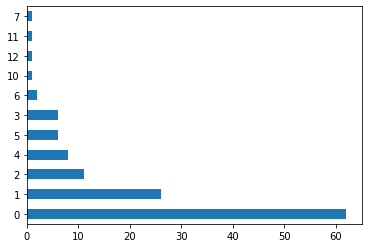

In [153]:
dataNew['TotalWorkYear befor'].value_counts().plot.barh()
plt.show
dataNew['TotalWorkYear befor'].value_counts().to_frame()

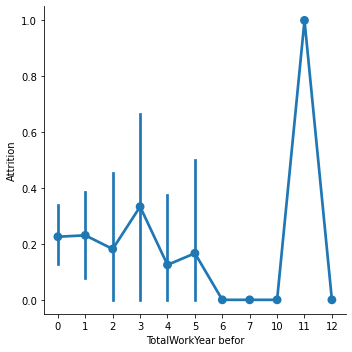

,Attrition
TotalWorkYear befor,
0,0.225806
1,0.230769
2,0.181818
3,0.333333
4,0.125000
5,0.166667
6,0.000000
7,0.000000
10,0.000000


In [161]:
sns.factorplot('TotalWorkYear befor', 'Attrition', data=dataNew)
plt.show() 

dataNew.groupby(['TotalWorkYear befor'])['Attrition'].mean().to_frame()

In [177]:
dataNew.groupby(['TotalWorkYear befor', 'JobRole'])['Attrition'].mean().to_frame()

Attrition
TotalWorkYear befor JobRole                             
0                   Healthcare Representative   0.000000
                    Human Resources             0.000000
                    Laboratory Technician       0.384615
                    Manager                     0.000000
                    Manufacturing Director      0.000000
                    Research Scientist          0.238095
                    Sales Executive             0.142857
                    Sales Representative        0.375000
1                   Healthcare Representative   0.000000
                    Human Resources             0.000000
                    Laboratory Technician       1.000000
                    Manufacturing Director      0.250000
                    Research Scientist          0.428571
                    Sales Executive             0.000000
                    Sales Representative        0.333333
2                   Healthcare Representative   0.000000
                    Laboratory Technician       0.000000
                    Manufacturing Director      0.000000
                    Research Director           0.000000
                    Research Scientist          0.500000
                    Sales Executive             0.000000
                    Sales Representative        1.000000
3                   Laboratory Technician       0.000000
                    Research Scientist          0.500000
                    Sales Executive             0.000000
4                   Laboratory Technician       1.000000
                    Manufacturing Director      0.000000
                    Research Director           0.000000
                    Research Scientist          0.000000
                    Sales Executive             0.000000
5                   Laboratory Technician       0.333333
                    Manager                     0.000000
                    Sales Executive             0.000000
6                   Manufacturing Director      0.000000
                    Sales Executive             0.000000
7                   Manufacturing Director      0.000000
10                  Sales Executive             0.000000
11                  Sales Executive             1.000000
12                  Manufacturing Director      0.000000

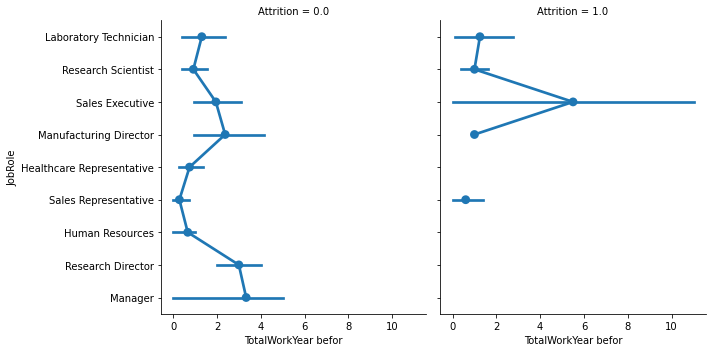

In [175]:
sns.factorplot('TotalWorkYear befor', 'JobRole', col='Attrition', data=dataNew)
plt.show()

1. salesExecutive는 전체1명에서 1명이 퇴사하였기에 이상치로 제외
2. 대부분의 퇴사자의 비율은 전 회사에서 근무한 횟수가 0~3년 이하인 경우에 해당. 
3. 이들의 직업은 대부분  Research Scientist(1,2,3), Laboratory Technician(1,2,3), Sales Representative(1,2)에 해당한다.

## YearsAtCompany

In [179]:
dataNew['YearsAtCompany'].value_counts().to_frame()

,YearsAtCompany
1,20
5,17
2,13
3,12
6,11
10,9
9,9
0,7
7,6
11,6


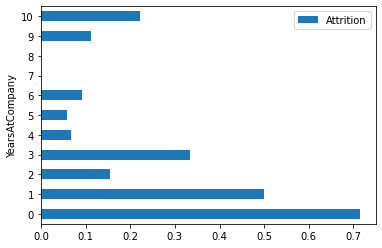

                Attrition
YearsAtCompany           
0                0.714286
1                0.500000
2                0.153846
3                0.333333
4                0.066667
5                0.058824
6                0.090909
7                0.000000
8                0.000000
9                0.111111
10               0.222222


In [212]:
dataNew[['Attrition','YearsAtCompany']].groupby(['YearsAtCompany']).mean().plot.barh() 
plt.show()
print(dataNew[['Attrition','YearsAtCompany']].groupby(['YearsAtCompany']).mean())

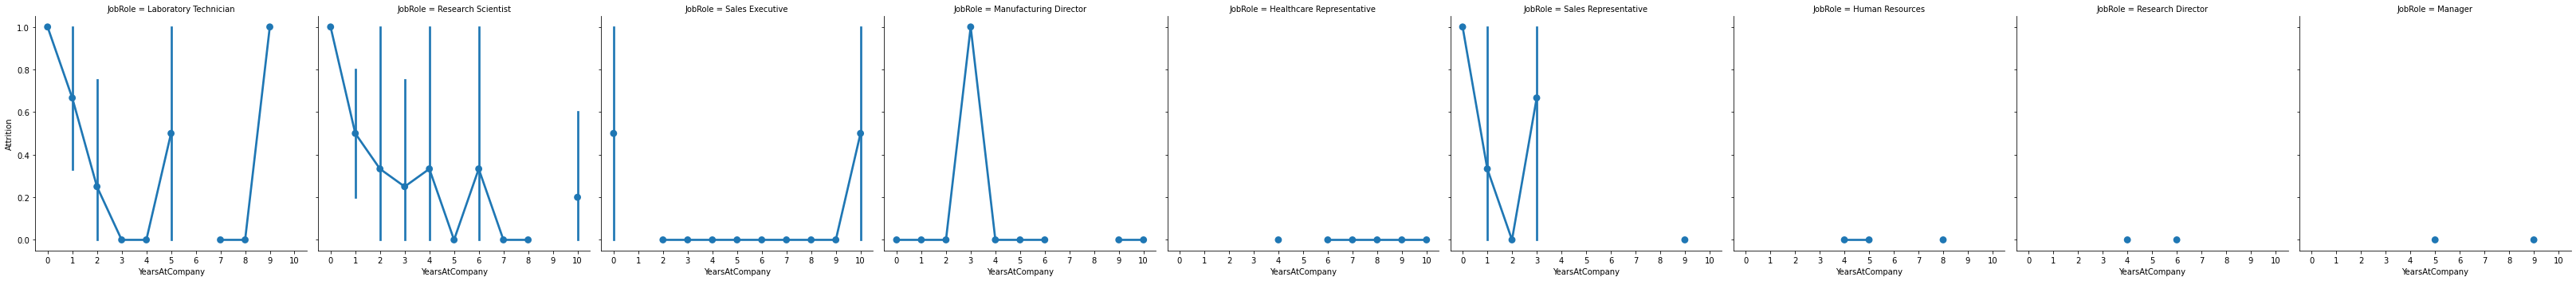

In [214]:
sns.factorplot('YearsAtCompany', 'Attrition', col='JobRole', data=dataNew)
plt.show()

In [209]:
dataNew['YearsAtCom']=1
dataNew.loc[data['YearsAtCompany'] <= 3, 'YearsAtCom'] = 1
dataNew.loc[(data['YearsAtCompany'] > 3) & (data['YearsAtCompany'] <= 6), 'YearsAtCom'] = 2
dataNew.loc[(data['YearsAtCompany'] > 6) & (data['YearsAtCompany'] <= 10), 'YearsAtCom'] = 3
dataNew.loc[data['YearsAtCompany'] > 10, 'YearsAtCompany'] = 4
dataNew['YearsAtCom']

7       1
26      3
39      2
44      1
54      1
       ..
1431    1
1433    2
1438    1
1463    3
1467    2
Name: YearsAtCom, Length: 125, dtype: int64

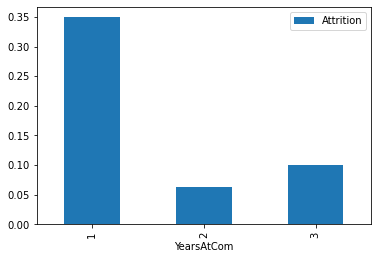

            Attrition
YearsAtCom           
1            0.349206
2            0.062500
3            0.100000


In [211]:
dataNew[["Attrition",'YearsAtCom']].groupby(['YearsAtCom']).mean().plot.bar()
plt.show()
print(dataNew[["Attrition",'YearsAtCom']].groupby(['YearsAtCom']).mean())

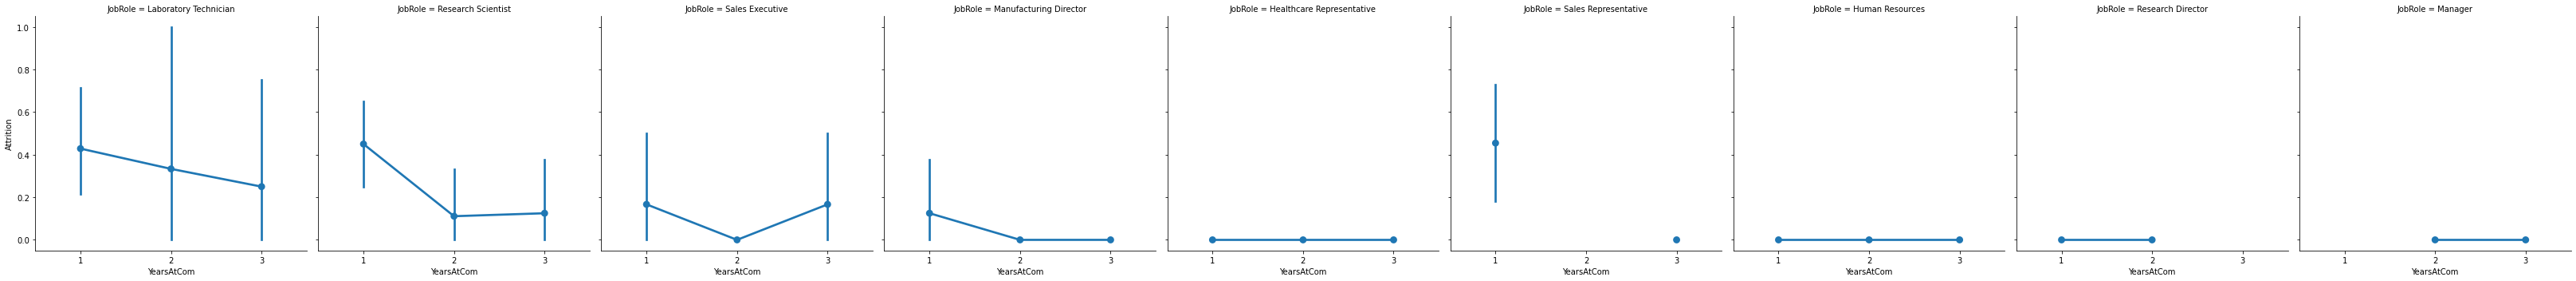

In [216]:
sns.factorplot('YearsAtCom', 'Attrition', col='JobRole', data=dataNew)
plt.show()

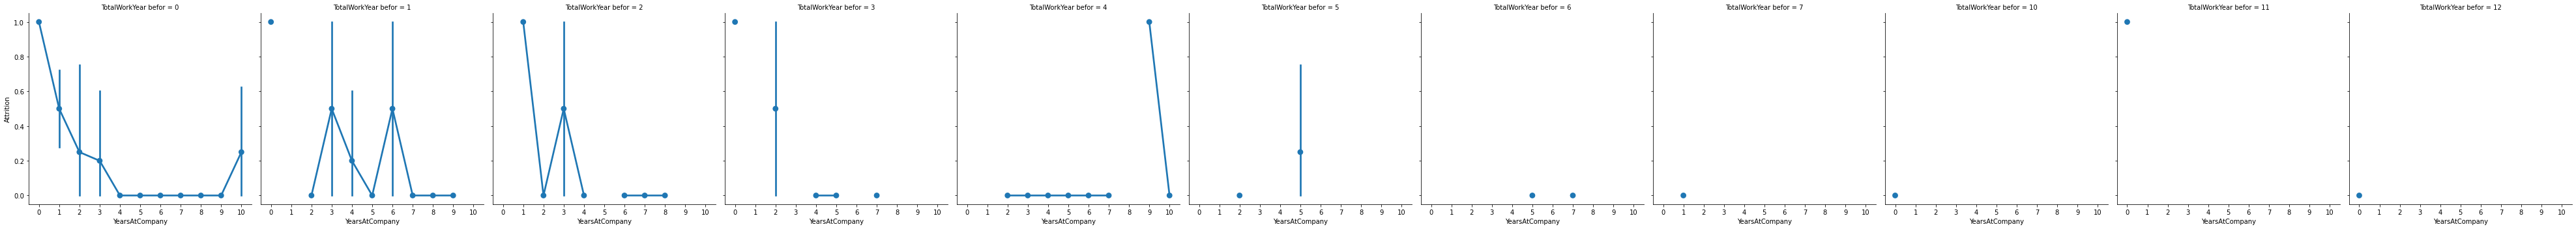

In [217]:
sns.factorplot('YearsAtCompany', 'Attrition', col='TotalWorkYear befor', data=dataNew)
plt.show()

1. 1의 집단은 34%, 2의 집단은 6%, 3의 집단은 10%로 나누어진다.
2. 대부분의 직업에서 직업레벨 1,2,3의 집단의 퇴사율이 가장 높았다. 그리고 이들중 현재 회사 연차가 짧을수록 퇴사 비율이 높았다. 
3. 이러한 분포는 지난 회사의 근무 시간과 매우 유사하다. 지난회사의 근무가 0~3일때 현재 회사의 퇴사가 이루어진다. 